In [2]:
import struct
import numpy as np

In [3]:
def load_data(images,labels):
    with open(labels,'rb') as labelsPath:
        magic,n = struct.unpack('>II',labelsPath.read(8))
        labels = np.fromfile(labelsPath,dtype=np.uint8)
    with open(images,'rb') as imagesPath:
        magic,num,rows,cols = struct.unpack('>IIII',imagesPath.read(16))
        images = np.fromfile(imagesPath,dtype=np.uint8).reshape(len(labels),784)
    return images,labels

In [4]:
train_images,train_labels = load_data('/home/rg/Documents/AI/Specialization/train-images-idx3-ubyte','/home/rg/Documents/AI/Specialization/train-labels-idx1-ubyte')

In [5]:
train_images.shape

(60000, 784)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_images,test_labels = load_data('/home/rg/Documents/AI/Specialization/t10k-images-idx3-ubyte','/home/rg/Documents/AI/Specialization/t10k-labels-idx1-ubyte')

In [8]:
test_images.shape

(10000, 784)

In [9]:
test_labels.shape

(10000,)

<h3>Steps to apply PCA:
<ol>
    <li>Standardize the data</li>
    <li>Compute the covariance matrix</li>
    <li>Solve for eigen values of the covariance matrix</li>
    <li>Figure out the top-N principal components</li>
</h3>
<h5>As our data contains images which are nothing but numpy array,first flatten the images and then standardize for each image </h5>

In [33]:
from matplotlib import pyplot as plt
# np.transpose(train_images[0]).shape
# Need to reshape the image before looking at it
temp = train_images[0].reshape(28,28) #(28,28) because 28*28 = 784.No,It cannot be otherwise

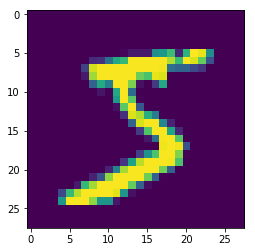

In [34]:
plt.imshow(temp) #Can also look at grey scale image with parameter cmap='Greys'
plt.show()

<h3>Step-1 is to standardize the data</h3>

In [35]:
train_temp = np.transpose(np.matrix(train_images))
train_images[0].shape

(784,)

<h3>Standardize the images</h3>

In [36]:
for i in range(len(train_temp)):
    mn,mx,std = np.min(train_temp[i]),np.max(train_temp[i]),np.std(train_temp[i])
    print(i,"=",mn,mx,std)

0 = 0 0 0.0
1 = 0 0 0.0
2 = 0 0 0.0
3 = 0 0 0.0
4 = 0 0 0.0
5 = 0 0 0.0
6 = 0 0 0.0
7 = 0 0 0.0
8 = 0 0 0.0
9 = 0 0 0.0
10 = 0 0 0.0
11 = 0 0 0.0
12 = 0 116 0.47531981163563275
13 = 0 254 1.361177911059225
14 = 0 216 0.8818089589020971
15 = 0 9 0.03674203995425405
16 = 0 0 0.0
17 = 0 0 0.0
18 = 0 0 0.0
19 = 0 0 0.0
20 = 0 0 0.0
21 = 0 0 0.0
22 = 0 0 0.0
23 = 0 0 0.0
24 = 0 0 0.0
25 = 0 0 0.0
26 = 0 0 0.0
27 = 0 0 0.0
28 = 0 0 0.0
29 = 0 0 0.0
30 = 0 0 0.0
31 = 0 0 0.0
32 = 0 16 0.06531918214089608
33 = 0 47 0.19463425457908362
34 = 0 157 1.0550026001811033
35 = 0 254 2.095095937275639
36 = 0 255 2.9620385187213367
37 = 0 254 3.323851860417368
38 = 0 255 4.8692574364293195
39 = 0 255 5.528987079826548
40 = 0 255 5.693631837388349
41 = 0 255 5.693532946442151
42 = 0 255 5.923018025724349
43 = 0 255 5.766072185133193
44 = 0 255 5.970362015452293
45 = 0 255 5.413376181044507
46 = 0 255 4.330457249112255
47 = 0 255 3.716529628415316
48 = 0 244 3.208663340560296
49 = 0 255 1.9430671970424032

325 = 0 255 109.93153610312673
326 = 0 255 110.41772854790524
327 = 0 255 107.92724831918026
328 = 0 255 99.0023694316328
329 = 0 255 85.10198464364028
330 = 0 255 68.56853396996323
331 = 0 255 48.67291716433677
332 = 0 255 26.653290246916775
333 = 0 255 9.892323932333706
334 = 0 253 4.4445921916414335
335 = 0 131 0.8949673954334253
336 = 0 163 0.7163929740954564
337 = 0 255 2.690125480293107
338 = 0 255 6.653176173745054
339 = 0 255 12.814098925261536
340 = 0 255 24.094131276562393
341 = 0 255 42.48389170612199
342 = 0 255 64.6728999808502
343 = 0 255 85.8480077617737
344 = 0 255 101.51058932391678
345 = 0 255 108.97263603818163
346 = 0 255 110.13783595310493
347 = 0 255 108.186999319984
348 = 0 255 103.9832481112743
349 = 0 255 103.04937248500377
350 = 0 255 108.90398484740277
351 = 0 255 110.83834211408848
352 = 0 255 109.8419129147987
353 = 0 255 111.10595643854262
354 = 0 255 111.24531868601507
355 = 0 255 106.38307780572869
356 = 0 255 94.99347733031756
357 = 0 255 81.39897303261

622 = 0 255 64.91154061951457
623 = 0 255 83.54220116313805
624 = 0 255 97.95662849955445
625 = 0 255 107.05028804650644
626 = 0 255 111.51947953584411
627 = 0 255 112.85553671139341
628 = 0 255 112.44966240663592
629 = 0 255 112.13351206606717
630 = 0 255 112.21538413223723
631 = 0 255 111.29572507625298
632 = 0 255 107.26407067991775
633 = 0 255 99.258953367933
634 = 0 255 86.58163228914694
635 = 0 255 71.44445154803641
636 = 0 255 55.77423325124395
637 = 0 255 41.32720634034559
638 = 0 255 29.54813811842559
639 = 0 255 20.216268634437025
640 = 0 255 11.923702682006496
641 = 0 254 5.092594448777777
642 = 0 225 1.4615797294556174
643 = 0 72 0.29393631963403244
644 = 0 0 0.0
645 = 0 0 0.0
646 = 0 217 2.8219111677883992
647 = 0 255 8.06788289942838
648 = 0 255 17.329075298757292
649 = 0 255 29.773110624558903
650 = 0 255 46.21752294847763
651 = 0 255 64.73156583910374
652 = 0 255 82.139865361831
653 = 0 255 95.70245272109307
654 = 0 255 104.5617966119345
655 = 0 255 109.14946631336929
6